Доля 'Да' в выборке: 0.70
95% доверительный интервал: [0.61, 0.79]


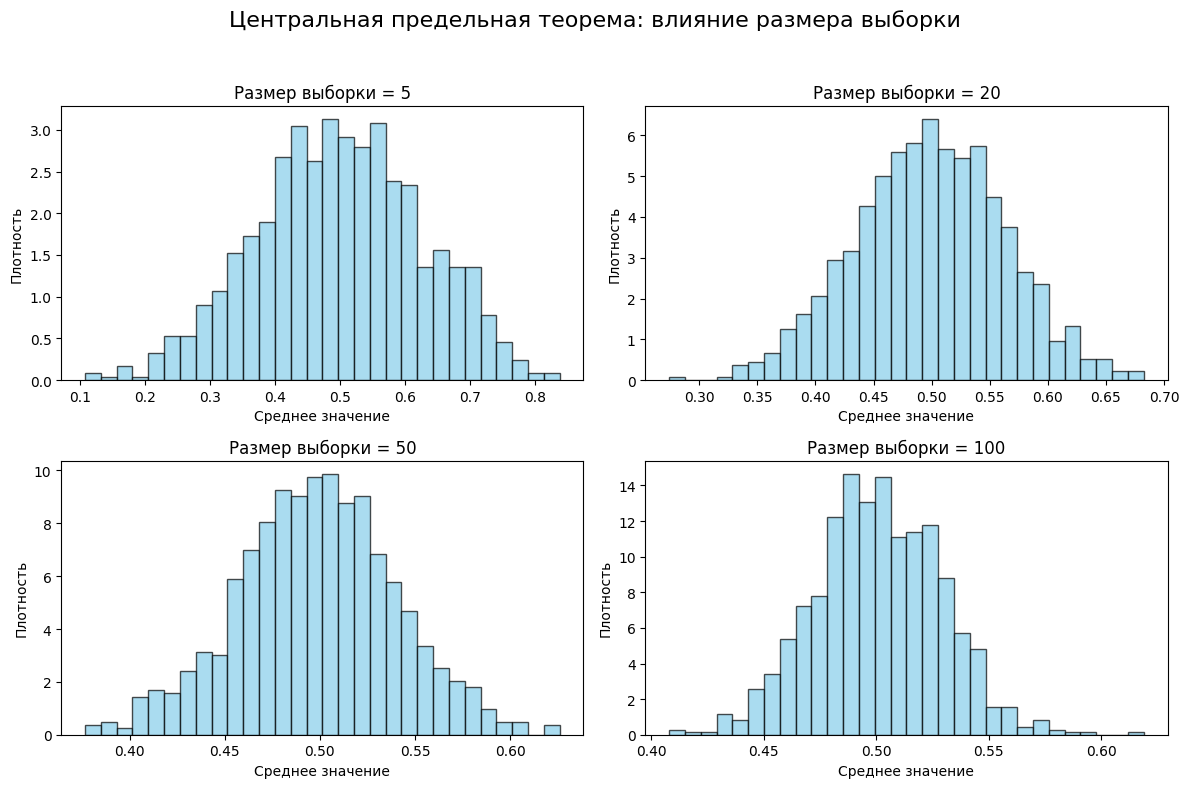

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Генеральная совокупность (1000 человек, 600 сказали "Да")
population = np.array([1] * 600 + [0] * 400)

# 2. Выборка из 100 человек
sample = np.random.choice(population, size=100, replace=False)

# 3. Доля "Да" в выборке
sample_proportion = np.mean(sample)

# 4. 95% доверительный интервал
z_score = stats.norm.ppf(0.975)  # для 95%
n = len(sample)
se = np.sqrt(sample_proportion * (1 - sample_proportion) / n)
ci_lower = sample_proportion - z_score * se
ci_upper = sample_proportion + z_score * se

print(f"Доля 'Да' в выборке: {sample_proportion:.2f}")
print(f"95% доверительный интервал: [{ci_lower:.2f}, {ci_upper:.2f}]")

# 5. Обсуждение:
# Этот интервал означает, что если бы мы повторяли опрос много раз,
# 95% таких интервалов покрывали бы истинную долю "Да" в населении (0.6)

# 6. Центральная предельная теорема (влияние размера выборки)
def simulate_sample_means(sample_size, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = np.random.uniform(0, 1, size=sample_size)
        means.append(np.mean(sample))
    return means

sample_sizes = [5, 20, 50, 100]
plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes, 1):
    means = simulate_sample_means(size)
    plt.subplot(2, 2, i)
    plt.hist(means, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Размер выборки = {size}")
    plt.xlabel("Среднее значение")
    plt.ylabel("Плотность")

plt.suptitle("Центральная предельная теорема: влияние размера выборки", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()